<a href="https://colab.research.google.com/github/Cksdud123/colab/blob/main/NLPModel_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import spacy
import string
import matplotlib.pyplot as plt
import warnings
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [134]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [136]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [137]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/twitter_sen/twcs/twcs.csv", nrows=100000)

In [139]:
# 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Ï§ë ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
df = df.sample(n=10000, replace=True)
df.head()

tweet_id     author_id  inbound                      created_at  \
50379     62275        130265     True  Wed Nov 01 20:05:41 +0000 2017   
20358     26225       UPSHelp    False  Wed Nov 22 16:37:29 +0000 2017   
56341     70716  SpotifyCares    False  Thu Nov 30 09:32:24 +0000 2017   
45299     56517        128787     True  Thu Nov 09 15:27:04 +0000 2017   
20405     26288  comcastcares    False  Fri Nov 03 15:12:32 +0000 2017   

                                                    text response_tweet_id  \
50379  Downloaded the @115858 iPhone update.  Thought...             62274   
20358  @121739 Is there something we can assist you w...               NaN   
56341  @131862 Hey Amy! We're here to help. Can you D...               NaN   
45299                         @MicrosoftHelps *10 not 20               NaN   
20405  @121754 I just wanted to follow up with you an...             26290   

       in_response_to_tweet_id  
50379                      NaN  
20358                  26226.0  
56341                  70717.0  
45299                  56514.0  
20405                  26286.0

In [140]:
# 'author_id'ÏôÄ 'text' Ïó¥Îßå Ï∂îÏ∂ú
sample_dataFrame = df[['author_id', 'text']]
sample_dataFrame.head(5)

author_id                                               text
50379        130265  Downloaded the @115858 iPhone update.  Thought...
20358       UPSHelp  @121739 Is there something we can assist you w...
56341  SpotifyCares  @131862 Hey Amy! We're here to help. Can you D...
45299        128787                         @MicrosoftHelps *10 not 20
20405  comcastcares  @121754 I just wanted to follow up with you an...

In [141]:
sample_dataFrame.shape

(10000, 2)

In [142]:
# Ïà´ÏûêÎßå ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def contains_only_digits(s):
    return bool(re.match("^[0-9]+$", s))

# ÏòÅÏñ¥Îßå ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def contains_only_english(s):
    return bool(re.match("^[a-zA-Z]+$", s))

# 'author_id' Ïó¥ÏóêÏÑú Ïà´ÏûêÎßå ÏûàÎäî ÌñâÎì§ÏùÑ ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÏÉàÎ°úÏö¥ DataFrameÏùÑ ÎßåÎì≠ÎãàÎã§.
numbers_only_df = sample_dataFrame[sample_dataFrame['author_id'].apply(contains_only_digits)]

# 'author_id' Ïó¥ÏóêÏÑú ÏòÅÏñ¥Îßå ÏûàÎäî ÌñâÎì§ÏùÑ ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÏÉàÎ°úÏö¥ DataFrameÏùÑ ÎßåÎì≠ÎãàÎã§.
english_only_df = sample_dataFrame[sample_dataFrame['author_id'].apply(contains_only_english)]

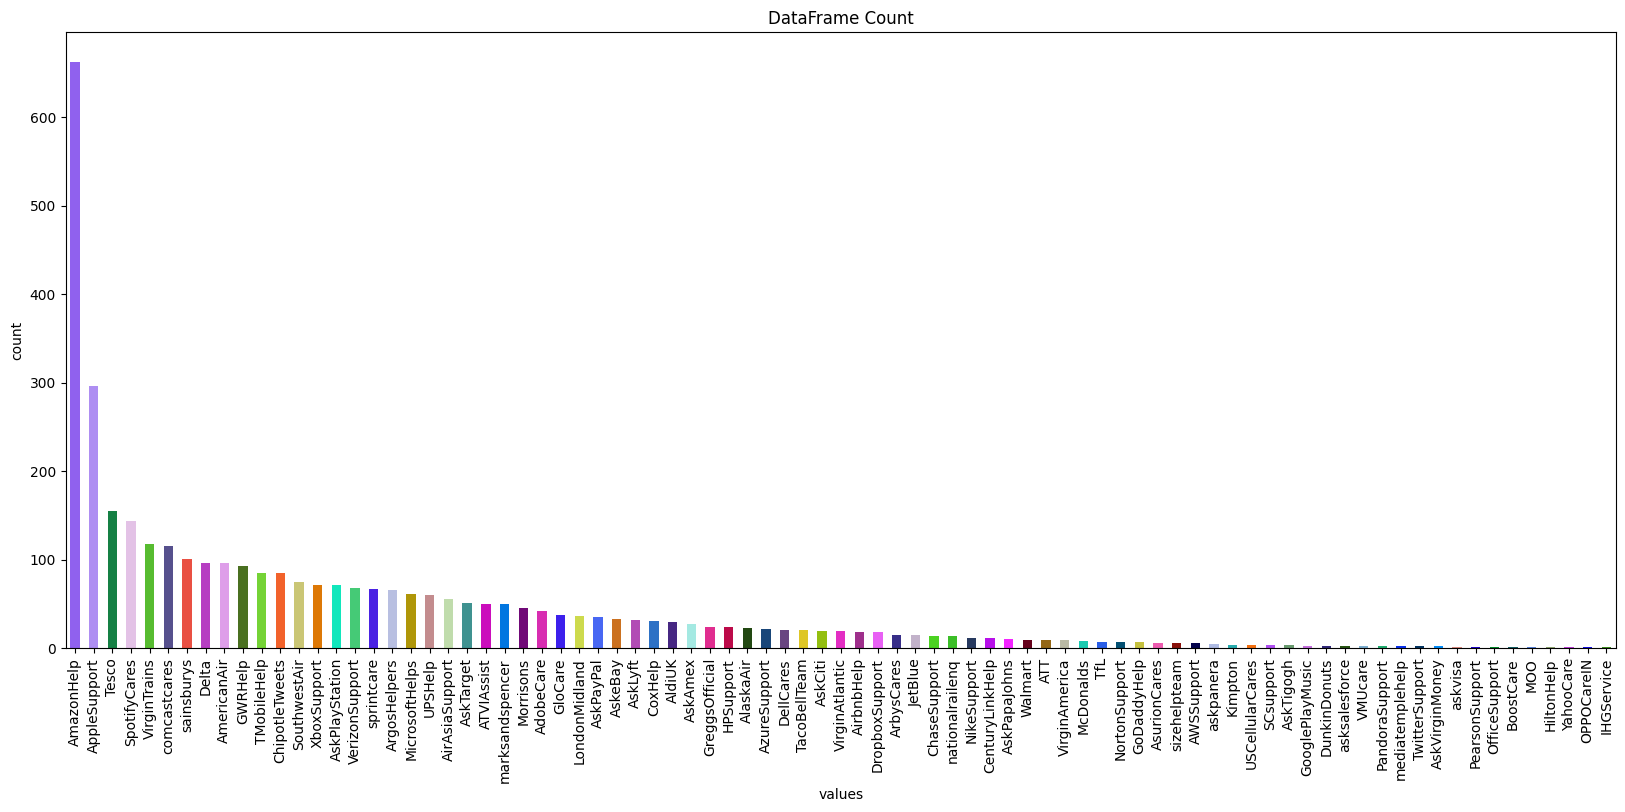

In [143]:
# 'author_id' Í∞íÎì§Ïùò Í∞úÏàòÎ•º ÏÑ∏Ïñ¥Ï§çÎãàÎã§.
value_counts = english_only_df['author_id'].value_counts()

# ÎûúÎç§ ÏÉâÏÉÅÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
num_unique_values = len(value_counts)
colors = np.random.rand(num_unique_values, 3)

# Î∞î Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
plt.figure(figsize=(20, 8))  # xÏ∂ï ÌÅ¨Í∏∞Î•º ÎäòÎ¶ΩÎãàÎã§.
value_counts.plot(kind='bar', color=colors)
plt.xticks(rotation=90)  # xÏ∂ï ÎùºÎ≤®ÏùÑ ÏÑ∏Î°úÎ°ú ÌöåÏ†ÑÏãúÌÇµÎãàÎã§.
plt.xlabel('values')
plt.ylabel('count')
plt.title('DataFrame Count')
plt.show()

In [144]:
english_only_text_df = english_only_df[['author_id', 'text']]
english_only_text_df

author_id                                               text
20358         UPSHelp  @121739 Is there something we can assist you w...
56341    SpotifyCares  @131862 Hey Amy! We're here to help. Can you D...
20405    comcastcares  @121754 I just wanted to follow up with you an...
48496       AskPayPal  @129724 Hello- Thanks for reaching out. Please...
57942          AldiUK  @132307 @132308 We'd love to hear the pitter-p...
...               ...                                                ...
10714       AdobeCare      @119122 Let us know if you need any help! ^RB
43477         AskAmex  @128286 Good afternoon, thanks for reaching ou...
35023    VirginTrains  @125860 If there is a last minute change in pl...
7747       sprintcare  @118160 We want to help you, in order for us t...
98207  AskPlayStation  @143784 Hello there. Let's look into that. Ple...

[3569 rows x 2 columns]

In [145]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎì§
def preprocess_text(text):
    # ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÌôò
    text = text.lower()

    # Íµ¨ÎëêÏ†ê Ï†úÍ±∞
    punc_to_remove = string.punctuation
    text = text.translate(str.maketrans('', '', punc_to_remove))

    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    STOPWORDS = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in STOPWORDS])

    # ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî Ïö©Ïñ¥ Ï†úÍ±∞
    cnt = Counter(text.split())
    FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
    text = " ".join([word for word in text.split() if word not in FREQWORDS])

    # Ïñ¥Í∞Ñ Ï∂îÏ∂ú
    stemmer = PorterStemmer()
    text = " ".join([stemmer.stem(word) for word in text.split()])

    # ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú
    lemmatizer = WordNetLemmatizer()
    pos_tagged_text = nltk.pos_tag(text.split())
    wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
    text = " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

    return text

# 'text' Ïó¥Ïóê Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
numbers_only_df['text'] = numbers_only_df['text'].apply(preprocess_text)
english_only_df['text'] = english_only_df['text'].apply(preprocess_text)

In [147]:
# ÌÜ†ÌÅ∞Ìôî Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def tokenize_text(text):
    return word_tokenize(text)

# ÌÜ†ÌÅ∞ÌôîÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† ÏÉàÎ°úÏö¥ Ïó¥ÏùÑ ÎßåÎì§Í≥†, ÌÜ†ÌÅ∞ÌôîÎ•º ÏàòÌñâÌï©ÎãàÎã§.
numbers_only_df['tokenized_text'] = numbers_only_df['text'].apply(tokenize_text)
# ÌÜ†ÌÅ∞ÌôîÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† ÏÉàÎ°úÏö¥ Ïó¥ÏùÑ ÎßåÎì§Í≥†, ÌÜ†ÌÅ∞ÌôîÎ•º ÏàòÌñâÌï©ÎãàÎã§.
english_only_df['tokenized_eng_text'] = english_only_df['text'].apply(tokenize_text)

          author_id                                    text_lemmatized  \
7429   AzureSupport  @118055 If you would like to get back in touch...   
29225    AmazonHelp  @124158 I'm sorry your parcel arrive in this c...   
95469  ArgosHelpers  @142996 It's rat 4.8/5 so pretty good! You can...   
60853         Tesco  @133064 Sorry Lauren, do they give you the cor...   
60897       GWRHelp  @133072 That's great to hear Amanda! I'll make...   

                                          tokenized_text  
7429   [@, 118055, If, you, would, like, to, get, bac...  
29225  [@, 124158, I, 'm, sorry, your, parcel, arrive...  
95469  [@, 142996, It, 's, rat, 4.8/5, so, pretty, go...  
60853  [@, 133064, Sorry, Lauren, ,, do, they, give, ...  
60897  [@, 133072, That, 's, great, to, hear, Amanda,...  


In [160]:
numbers_only_df = numbers_only_df[['author_id','tokenized_text']]
numbers_only_df.head(5)

author_id                                     tokenized_text
50379    130265               [problem, nope, applesupport, still]
17297    120880   [earlier, respons, airasiasupport, case00231766]
70878    135867               [custom, servic, poorcustomerservic]
9650     118781  [work, great, i, ‚Äô, ll, call, custom, servic, ...
26206    123336                         [everyth, like, gmail, ok]

In [163]:
english_only_df = english_only_df[['author_id','tokenized_eng_text']]
english_only_df.head(5)

author_id                            tokenized_eng_text
20358       UPSHelp                          [httpstcowkjhdxwgrq]
56341  SpotifyCares  [well, see, suggest, km, httpstcoldfdzrinat]
57942        AldiUK                   [ü•ï, glad, ad, kevinandkati]
73431  AppleSupport    [step, perform, error, httpstcolmmvpdjgnn]
29865   TMobileHelp                                    [dm, kaew]

In [164]:
# 'numbers_only_df'ÏóêÏÑú Îπà Î¨∏ÏûêÏó¥Í≥º '[]'Î•º Í≤∞Ï∏°ÏπòÎ°ú Ï≤òÎ¶¨ÌïòÍ≥† Ï†úÍ±∞Ìï©ÎãàÎã§.
numbers_only_df = numbers_only_df.replace("", np.nan)
numbers_only_df = numbers_only_df.replace("[]", np.nan)
numbers_only_df = numbers_only_df.dropna()

# 'english_only_df'ÏóêÏÑú Îπà Î¨∏ÏûêÏó¥Í≥º '[]'Î•º Í≤∞Ï∏°ÏπòÎ°ú Ï≤òÎ¶¨ÌïòÍ≥† Ï†úÍ±∞Ìï©ÎãàÎã§.
english_only_df = english_only_df.replace("", np.nan)
english_only_df = english_only_df.replace("[]", np.nan)
english_only_df = english_only_df.dropna()

In [165]:
# Í≤∞Í≥º ÌôïÏù∏
numbers_only_df.head()

author_id                                     tokenized_text
50379    130265               [problem, nope, applesupport, still]
17297    120880   [earlier, respons, airasiasupport, case00231766]
70878    135867               [custom, servic, poorcustomerservic]
9650     118781  [work, great, i, ‚Äô, ll, call, custom, servic, ...
26206    123336                         [everyth, like, gmail, ok]

In [166]:
english_only_df.head()

author_id                            tokenized_eng_text
20358       UPSHelp                          [httpstcowkjhdxwgrq]
56341  SpotifyCares  [well, see, suggest, km, httpstcoldfdzrinat]
57942        AldiUK                   [ü•ï, glad, ad, kevinandkati]
73431  AppleSupport    [step, perform, error, httpstcolmmvpdjgnn]
29865   TMobileHelp                                    [dm, kaew]

In [170]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÌÜ†ÌÅ∞ÌôîÎêú ÌÖçÏä§Ìä∏ Ïó¥ Í∞ÄÏ†∏Ïò§Í∏∞
tokens_list = numbers_only_df['tokenized_text'].tolist() + english_only_df['tokenized_eng_text'].tolist()

# Î™®Îì† ÌÜ†ÌÅ∞Îì§ÏùÑ ÌïòÎÇòÏùò Î¶¨Ïä§Ìä∏Î°ú ÌÜµÌï©
all_tokens = [token for tokens in tokens_list for token in tokens]

# ÌÜ†ÌÅ∞Îì§Ïùò ÎπàÎèÑÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Îã®Ïñ¥ ÏßëÌï© ÏÉùÏÑ±
word_counter_num = Counter(all_tokens)
word_vocab_num = {word: idx for idx, (word, _) in enumerate(word_counter_num.items())}

print(word_vocab_num)

{'problem': 0, 'nope': 1, 'applesupport': 2, 'still': 3, 'earlier': 4, 'respons': 5, 'airasiasupport': 6, 'case00231766': 7, 'custom': 8, 'servic': 9, 'poorcustomerservic': 10, 'work': 11, 'great': 12, 'i': 13, '‚Äô': 14, 'll': 15, 'call': 16, 'wait': 17, 'nearli': 18, 'hr': 19, 'disconnect': 20, 'everyth': 21, 'like': 22, 'gmail': 23, 'ok': 24, 'perform': 25, 'hour': 26, 'suppos': 27, '45hr': 28, 'excess': 29, 'serv': 30, 'airlin': 31, 'consum': 32, 'dm': 33, 'resolv': 34, 'situat': 35, 'way': 36, 'muchli': 37, 'm': 38, 'disabl': 39, 'thx': 40, 'doubt': 41, 'spectrumsdownagain': 42, 'httpstcouyuyki30rl': 43, 'letter': 44, '‚Äú': 45, 'iÔ∏è': 46, '‚Äù': 47, 'amp': 48, 'remvd': 49, 'cart': 50, 'go': 51, 'help': 52, 'hpcswu': 53, 'hpprnt': 54, 'detail': 55, 'verifi': 56, 'sheerid': 57, '13th': 58, 'nov': 59, 'howev': 60, 'moment': 61, 'forget': 62, 'click': 63, 'link': 64, 'email': 65, 'final': 66, 'process': 67, 'late': 68, 'week': 69, 'time': 70, 'rebook': 71, 'u': 72, 'asap': 73, 'prec

In [190]:
# ÏõåÎìúÏûÑÎ≤†Îî© Ïã§Ìñâ
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÜ†ÌÅ∞ÌôîÎêú ÌÖçÏä§Ìä∏ Ïó¥ Í∞ÄÏ†∏Ïò§Í∏∞ (ÏòàÏãúÎ°ú numbers_only_dfÏùò tokenized_text ÏÇ¨Ïö©)
tokens_list_emb = numbers_only_df['tokenized_text'].tolist() + english_only_df['tokenized_eng_text'].tolist()

# Word2Vec Î™®Îç∏ ÌïôÏäµ
tokens_list_emb = numbers_only_df['tokenized_text'].tolist() + english_only_df['tokenized_eng_text'].tolist()
model_word2vec = Word2Vec(sentences=tokens_list_emb, vector_size=100, window=5, min_count=1, sg=1)

# Word2Vec Î™®Îç∏Ïùò Îã®Ïñ¥ÏôÄ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ Îß§Ìïë
word_vocab_num = {word: idx for idx, word in enumerate(model_word2vec.wv.index_to_key)}
word_embeddings = model_word2vec.wv.vectors

# ÏõåÎìú ÏûÑÎ≤†Îî© Ï†ÅÏö© Í≤∞Í≥º Ï∂úÎ†•
print("Word Embeddings Shape:", word_embeddings.shape)

Word Embeddings Shape: (6806, 100)


In [191]:
word_embeddings

array([[-1.7581308e-01,  1.8885724e-01,  4.5738511e-02, ...,
        -3.6821711e-01,  3.5971496e-02, -7.3327653e-02],
       [-1.5037060e-01,  1.6084488e-01,  1.9676539e-03, ...,
        -2.8307915e-01,  2.3401727e-03, -7.6687537e-02],
       [-1.5229213e-01,  1.6065072e-01, -1.2124160e-02, ...,
        -3.1641117e-01,  3.4723863e-02, -1.0665659e-01],
       ...,
       [-2.0773970e-02,  2.9353176e-03,  3.0321751e-03, ...,
        -1.9196095e-02,  3.2081732e-03, -1.0123287e-02],
       [-8.0315424e-03,  1.8550985e-02, -1.2454526e-03, ...,
        -2.0580351e-02,  7.1050040e-03, -1.1389686e-02],
       [-5.9594512e-03,  2.9288174e-04,  6.5013850e-03, ...,
         4.3318332e-03,  1.3465858e-03, -2.0984674e-03]], dtype=float32)

In [193]:
# ÌõàÎ†®ÏÖãÍ≥º Í≤ÄÏ¶ùÏÖã Î∂ÑÎ¶¨
X = numbers_only_df['tokenized_text'].tolist() + english_only_df['tokenized_eng_text'].tolist()
y = [0] * len(numbers_only_df) + [1] * len(english_only_df)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
X_train = [[word_vocab_num[word] for word in tokens] for tokens in X_train]
X_val = [[word_vocab_num[word] for word in tokens] for tokens in X_val]

# Ìå®Îî© Ï≤òÎ¶¨
max_sequence_length = max(len(seq) for seq in X_train + X_val)  # ÏµúÎåÄ ÏãúÌÄÄÏä§ Í∏∏Ïù¥
X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='post')
X_val = pad_sequences(X_val, maxlen=max_sequence_length, padding='post')

# LSTM Î™®Îç∏ Íµ¨ÏÑ±
embedding_dim = 100  # ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®Ïõê
vocab_size = len(word_vocab_num)  # Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, weights=[word_embeddings]))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Î™®Îç∏ ÌõàÎ†®
epochs = 10
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

ValueError: ignored